<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>



# **시각화 라이브러리 ② - Seaborn**



- Seaborn은 파이썬 시각화 라이브러리 중 하나입니다.
- Matplotlib 기반으로 작성된 고수준 인터페이스를 제공하여 쉽게 시각화할 수 있도록 도와줍니다.
- Matplotlib보다 훨씬 간편하고 직관적인 API를 제공합니다.
- 이를 통해 통계 그래픽을 생성하는 데 필요한 많은 작업을 단순화할 수 있습니다.
- Matplotlib과 함께 사용되는 것이 일반적입니다.
- Matplotlib에서 지원하지 않는 색상 팔레트, 테마 등을 제공합니다.
- Matplotlib보다 훨씬 다양한 스타일과 테마를 지원하며, 더욱 효과적인 시각화를 가능하게 합니다.

## **1. 환경준비**

- 이후 사용할 기본 라이브러를 불러오고 분석 대상 데이터를 읽어옵니다.

In [ ]:
# 한글 표시를 위해 설치
!pip install koreanize_matplotlib -q

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/admission.csv'
admission = pd.read_csv(path)

# 확인
admission.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


**📋 데이터 정보**

- GRE: GRE 시험 점수 (Graduate Record Examination)
- TOEFL: TOEFL 시험 점수
- RANK: 지원자의 학부/출신 대학 랭킹, 1~5 등급
- SOP: 자기소개서(Statement of Purpose) 점수, 1~5 범위
- LOR: 추천서(Letter of Recommendation) 점수, 1~5 범위
- GPA: 학부 성적 (Grade Point Average), 10점 만점
- RESEARCH: 연구 경험 여부 (0 = 없음, 1 = 있음)
- ADMIT: 합격 여부 (0 = 불합격, 1 = 합격)

## **2. 기본 그래프**

- 우선 가장 일반적인 차트 기능부터 살펴봅니다.

### **2.1. Histogram**

- **histplot()** 함수는 단일 열의 데이터 분포를 Histogram으로 표시합니다.
- **hue** 매개변수를 사용하여 구분 기준이 되는 범주형 열을 지정할 수도 있습니다.

- GRE 열 데이터 분포를 Histogram으로 확인해 봅니다.

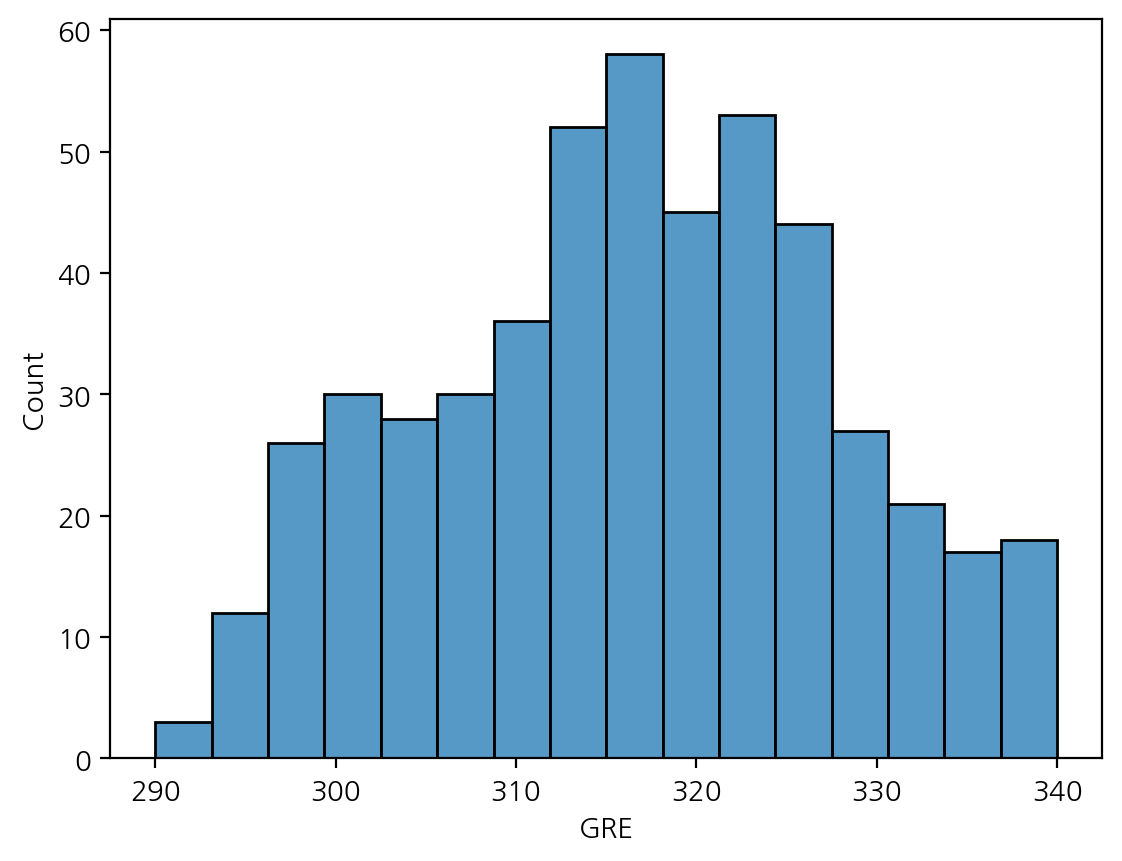

In [3]:
sns.histplot(x='GRE', data=admission, bins=16, ec='k')
plt.show()

- GRE 열 데이터 분포를 ADMIT 열을 기준으로 구분해 확인해 봅니다.

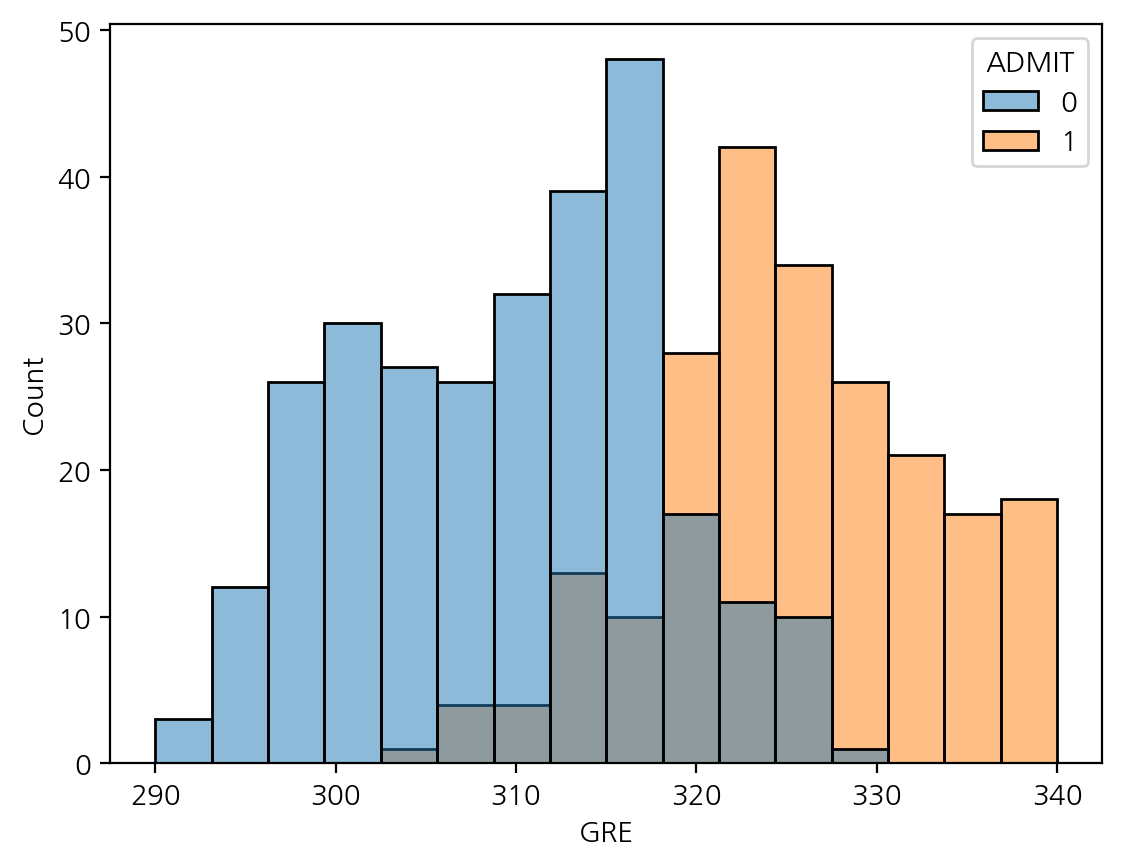

In [4]:
sns.histplot(x='GRE', hue='ADMIT', data=admission, bins=16, ec='k')
plt.show()

### **2.2. Density Plot**

- **kdeplot()** 함수는 단일 열 또는 두 열의 데이터 분포를 Density Plot으로 표시합니다.
- 숫자형 열의 값 분포를 확인할 수 있는 **커널밀도추정(KDE, Kernel Density Estimation)** 그래프를 표시합니다.
- 그래프 아래의 면적이 1이 됩니다.
- x와 y 매개변수중 하나를 사용하여 열을 지정해 표시되는 방향을 조정합니다.
- hue 매개변수를 사용하여 구분 기준이 되는 범주형 열을 지정할 수 있습니다.

- GRE 열의 데이터 분포를 Density Plot으로 확인해 봅니다.

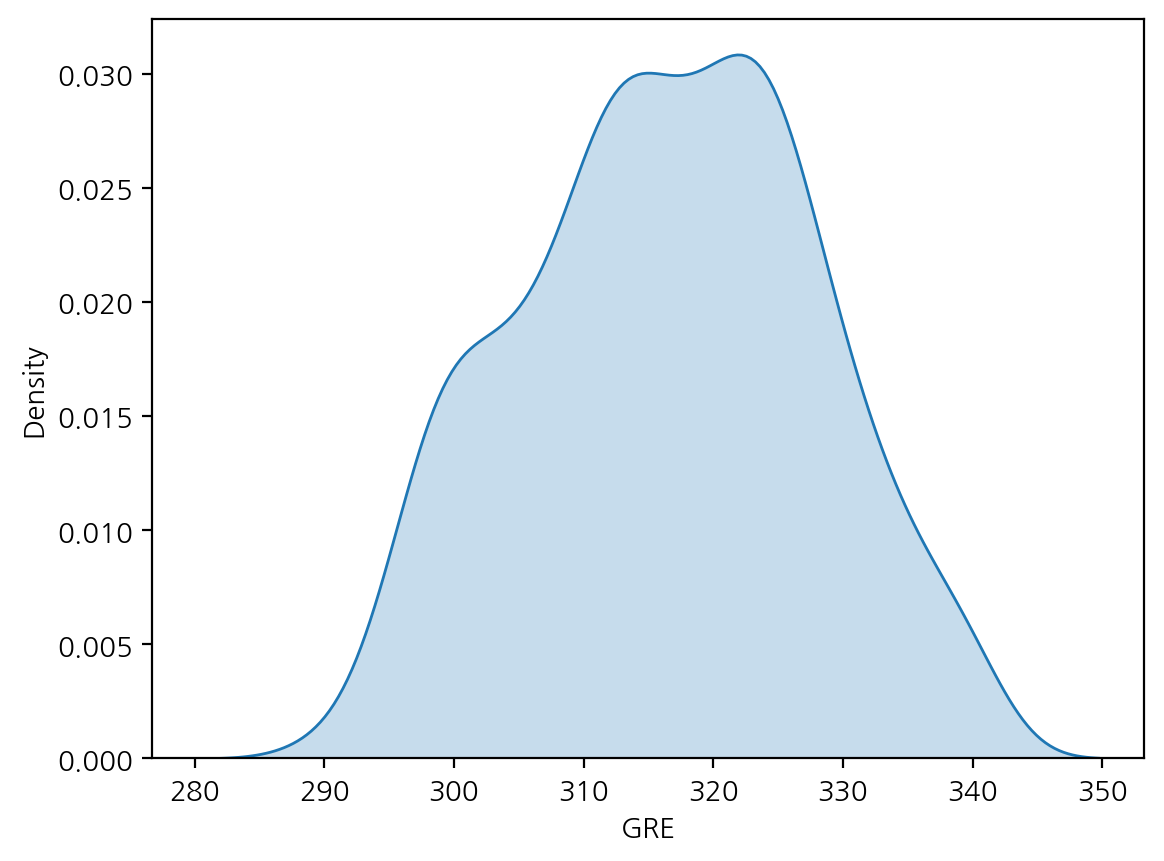

In [5]:
sns.kdeplot(x='GRE', data=admission, fill=True, bw_adjust=1) # bw_adjust=1 (기본값)
plt.show()

- GRE 열의 데이터 분포를 ADMIT 열을 기준으로 구분해 확인해 봅니다.
- **common_norm=False**를 지정하면 그래프 각각의 면적이 1이 됩니다.

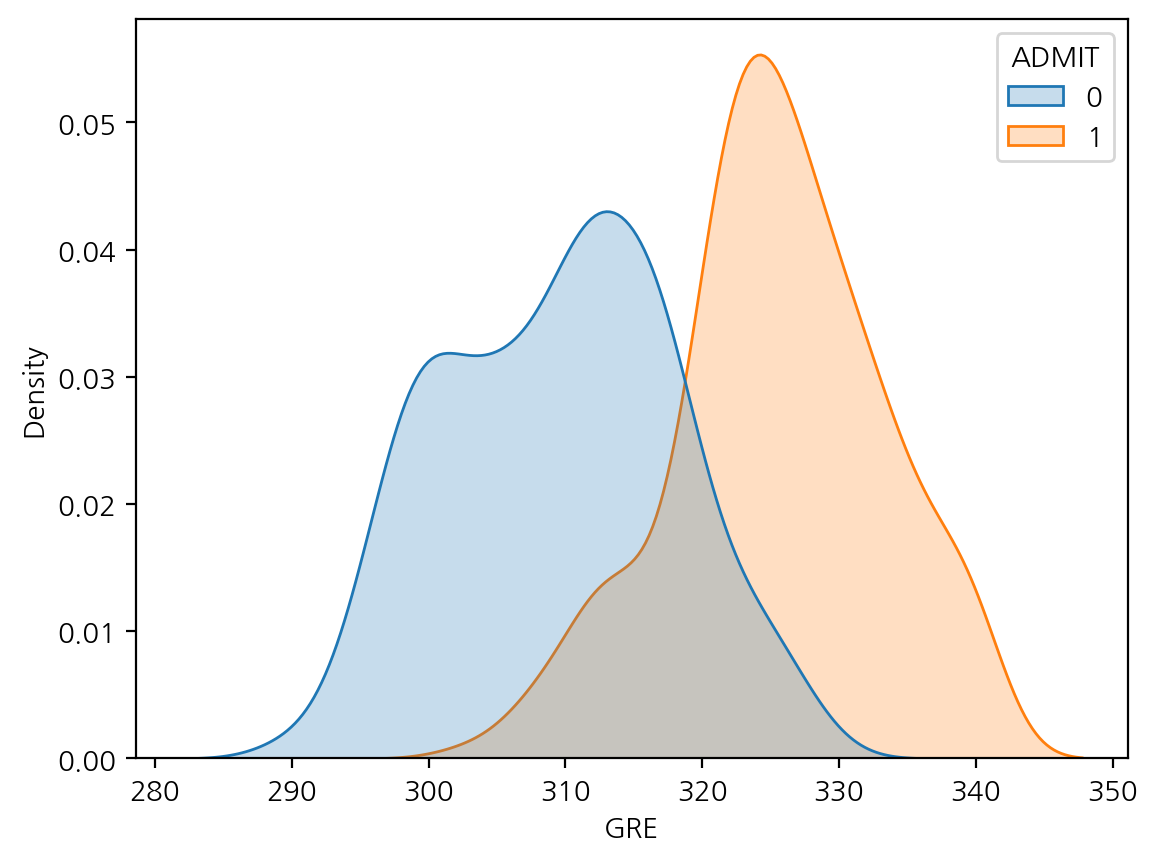

In [6]:
sns.kdeplot(x='GRE', hue='ADMIT', data=admission, common_norm=False, fill=True)
plt.show()

- **common_norm=True**를 지정하면 두 그래프 면적의 합이 1이 됩니다.

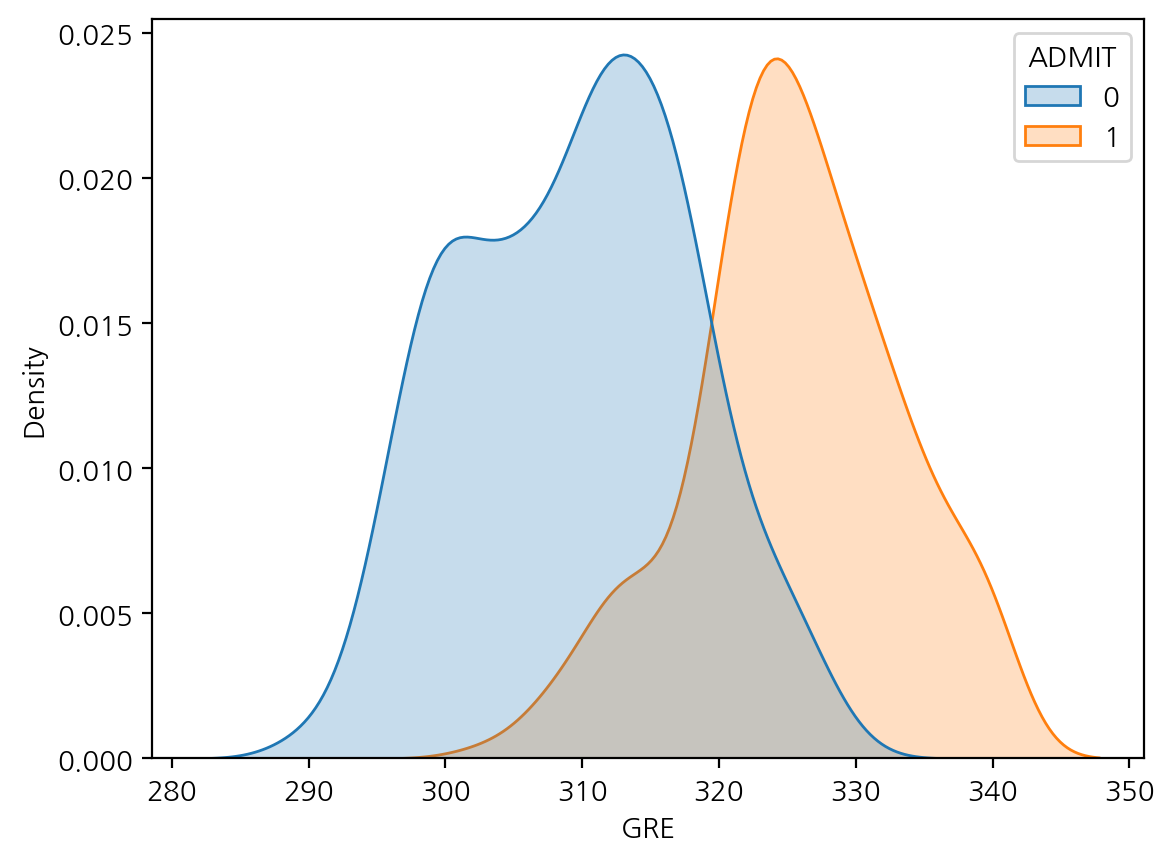

In [8]:
sns.kdeplot(x='GRE', hue='ADMIT', data=admission, common_norm=True, fill=True)
plt.show()

- histplot() 함수에 **kde=True** 옵션을 추가하면 히스토그램과 KDE 곡선을 같이 볼 수 있습니다.

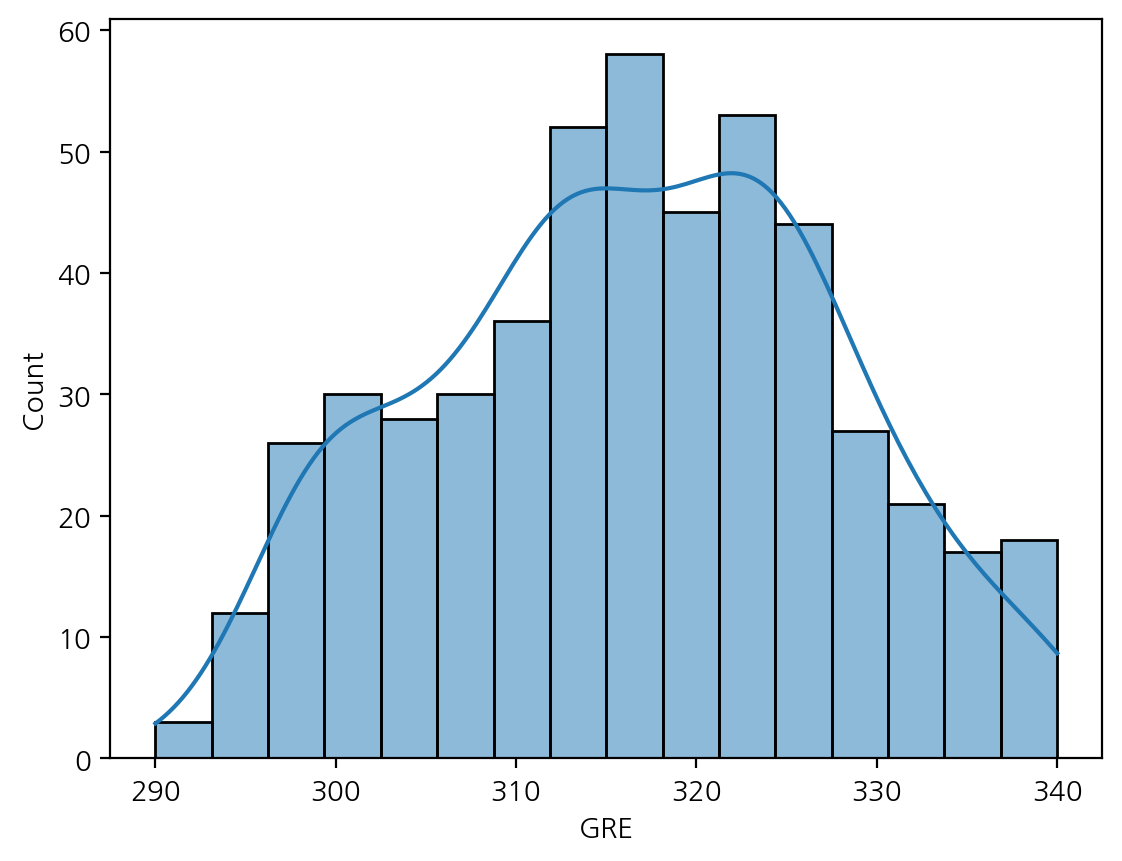

In [7]:
sns.histplot(x='GRE', data=admission, bins=16, ec='k', kde=True)
plt.show()

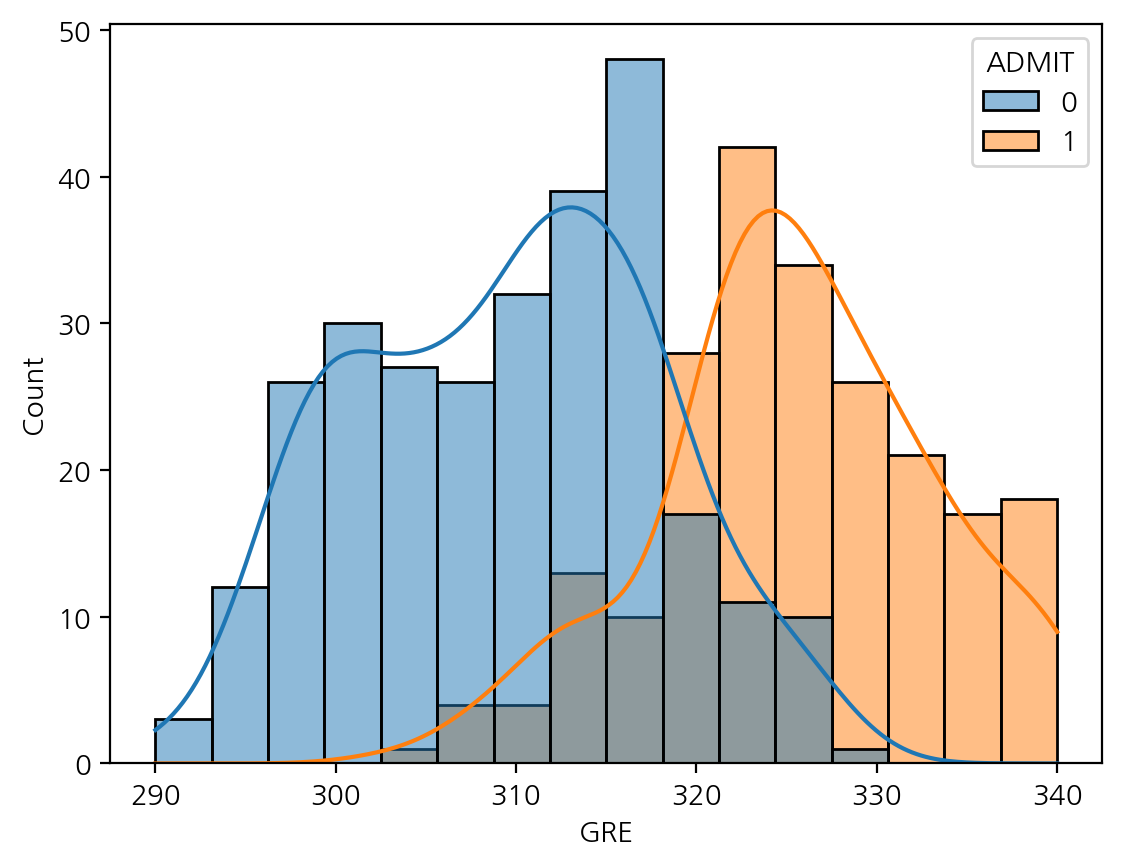

In [10]:
sns.histplot(x='GRE', hue='ADMIT', data=admission, bins=16, ec='k', kde=True)
plt.show()

### **2.3. Box Plot**

- **boxplot()** 함수는 단일 열나 여러 열의 분포를 Box Plot으로 표시합니다.
- 열의 분포와 이상치(Outlier)를 시각적으로 탐색할 수 있습니다.
- boxplot() 함수는 x와 y 매개변수중 하나를 사용하여 열을 지정합니다.
-  hue 매개변수를 사용하여 구분 기준이 되는 범주형 열을 지정할 수 있습니다.

- GRE 열의 데이터 분포를 Box Plot으로 확인해 봅니다.
- y 축에 대상 열을 지정하면 세로 형태로 표시됩니다.

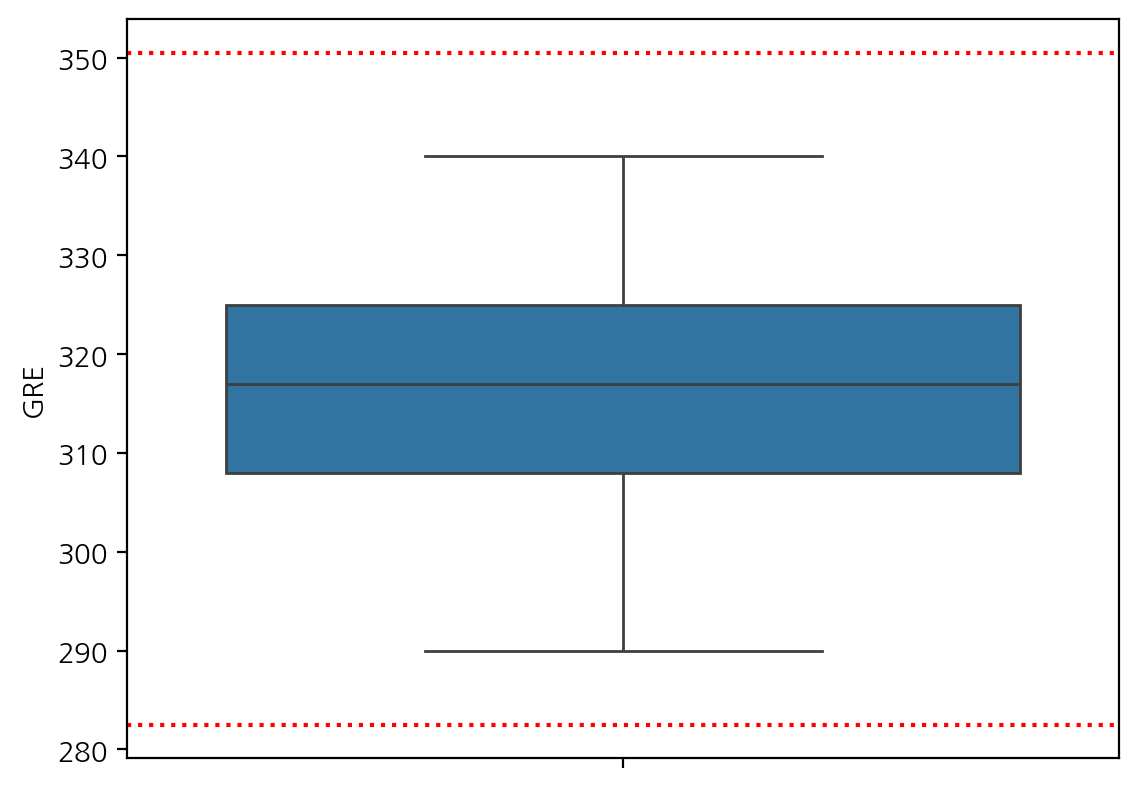

In [9]:
q3 = admission['GRE'].describe()['75%']
q1 = admission['GRE'].describe()['25%']
iqr = q3 - q1

sns.boxplot(y='GRE', data=admission)
plt.axhline(q3 + iqr * 1.5, color='r', linestyle=':')
plt.axhline(q1 - iqr * 1.5, color='r', linestyle=':')
plt.show()

- GRE 열의 데이터 분포를 ADMIT 열을 기준으로 구분해 확인해 봅니다.
- x 축에 구분 기준이 되는 열을 지정합니다.

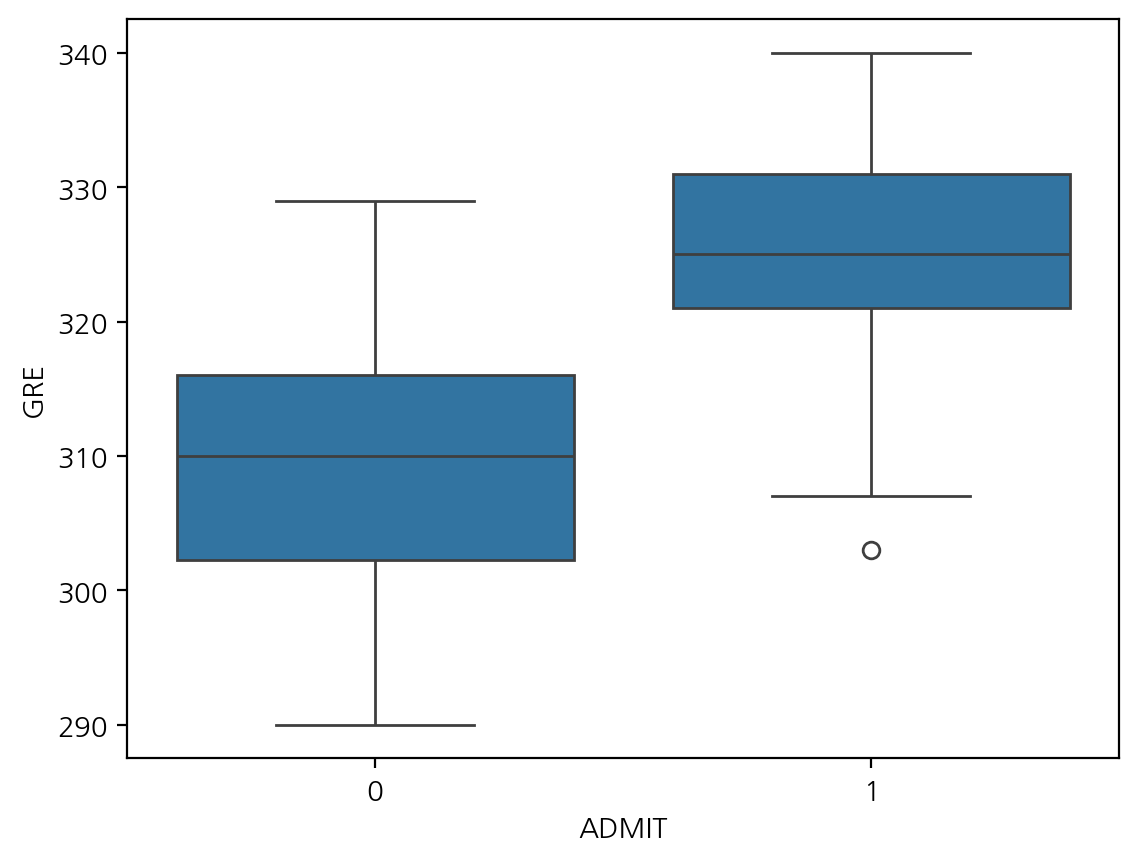

In [11]:
sns.boxplot(y='GRE', x='ADMIT', data=admission)
plt.show()

- x 축에 대상 열을 지정하면 가로 형태로 표시할 수 있습니다.

In [ ]:
sns.boxplot(x='GRE', data=admission)
plt.show()

- y축에 구분 기준이 되는 열을 지정하고 **orient='h'**를 지정합니다.

In [ ]:
sns.boxplot(x='GRE', y='ADMIT', data=admission, orient='h', color='tab:orange', width=0.5)
plt.show()

In [ ]:
sns.boxplot(x='GRE', y='ADMIT', hue='RESEARCH', data=admission, orient='h')
plt.show()

- Box Plot의 정확한 의미는 이후에 살펴볼 예정입니다.

## **3. 고급 그래프**

- 다양한 정보를 쉽게 확인할 수 있는 멋진 그래프를 살펴봅니다.

### **3.1. Distribution Plot**

- **distplot()** 함수는 단일 열의 분포를 시각화하기 위한 함수입니다.
- Histogram과 Density Plot을 같이 표시할 수 있습니다.
- **kde** 매개변수를 사용하여 커널밀도함수 그래프를 추가로 그릴지 여부를 지정합니다.
- **rug** 매개변수를 사용하여 각 데이터 포인트의 위치를 보여주는 선을 그릴지 지정할 수 있습니다.
- **hist_kws** 매개변수에 꾸미기 위한 다양한 설정 값을 딕셔너리 형태로 전달합니다.

In [ ]:
sns.distplot(x=admission['GRE'], bins=16, hist_kws={'edgecolor': 'k'}, rug=True)
plt.show()

In [ ]:
sns.distplot(x=admission['GRE'], bins=16, hist_kws={'edgecolor': 'k'}, rug=False, kde=False)
plt.show()

In [ ]:
sns.distplot(x=admission['GRE'], bins=16, hist_kws={'edgecolor': 'k'}, rug=True, hist=False)
plt.show()

In [ ]:
sns.distplot(x=admission['GRE'], bins=16,
             hist_kws={'edgecolor': 'k'},
             kde_kws={'color': 'tab:orange', 'linewidth': 0.5},
             rug=True,
             rug_kws={'color': 'k'})
plt.show()

### **3.2. Joint Plot**

- **jointplot()** 함수는 두 열 간의 관계를 시각화하기 위해 산점도와 히스토그램을 함께 그려줍니다.
- **kind** 매개변수를 사용하여 그래프의 종류를 지정할 수 있습니다.
- **hue** 매개변수를 사용하여 구분 기준이 되는 범주형 열을 지정할 수 있습니다.

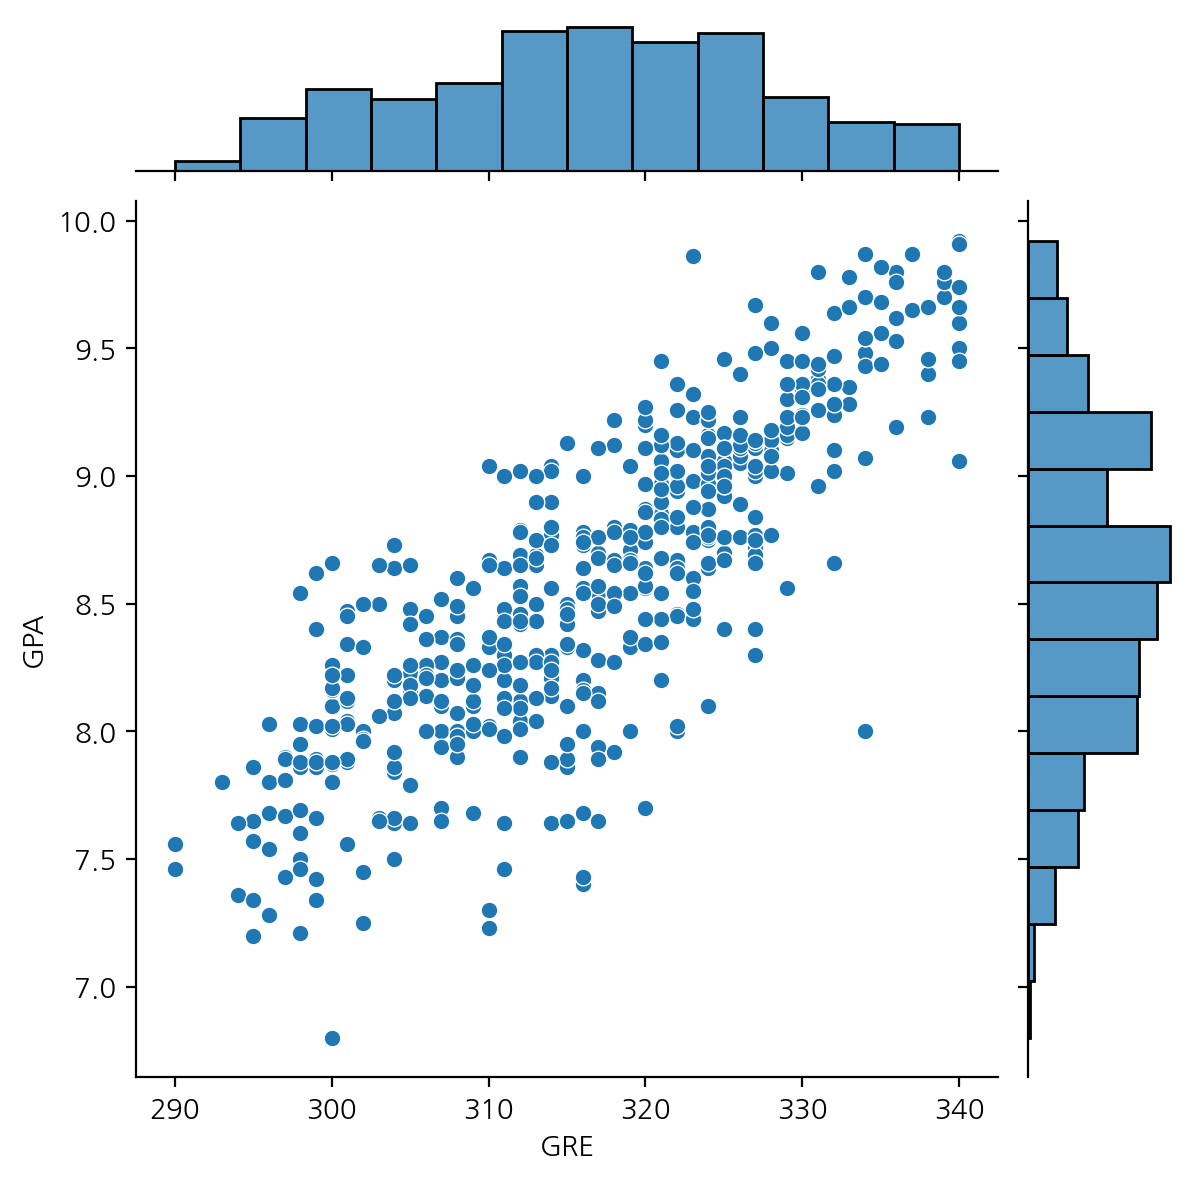

In [12]:
sns.jointplot(x='GRE', y='GPA', data=admission)
plt.show()


- Seaborn의 가장 큰 특징은 hue 매개변수에 범주형 열을 지정해 색깔을 구분해 볼 수 있다는 것입니다.
- ADMIT 열을 구분 기준 열로 지정해 봅니다.

In [ ]:
sns.jointplot(x='GRE', y='GPA', data=admission, hue='ADMIT')
plt.show()

### **3.3. Pair Plot**

- **pairplot()** 함수는 열 간의 산점도 및 열 분포를 한 번에 시각화하는 기능을 제공합니다.
- hue 매개변수를 사용하여 추가적인 범주형 열을 지정할 수 있습니다.
- 하지만 그려지는 데 **시간이 많이 걸리는 단점**이 있습니다.

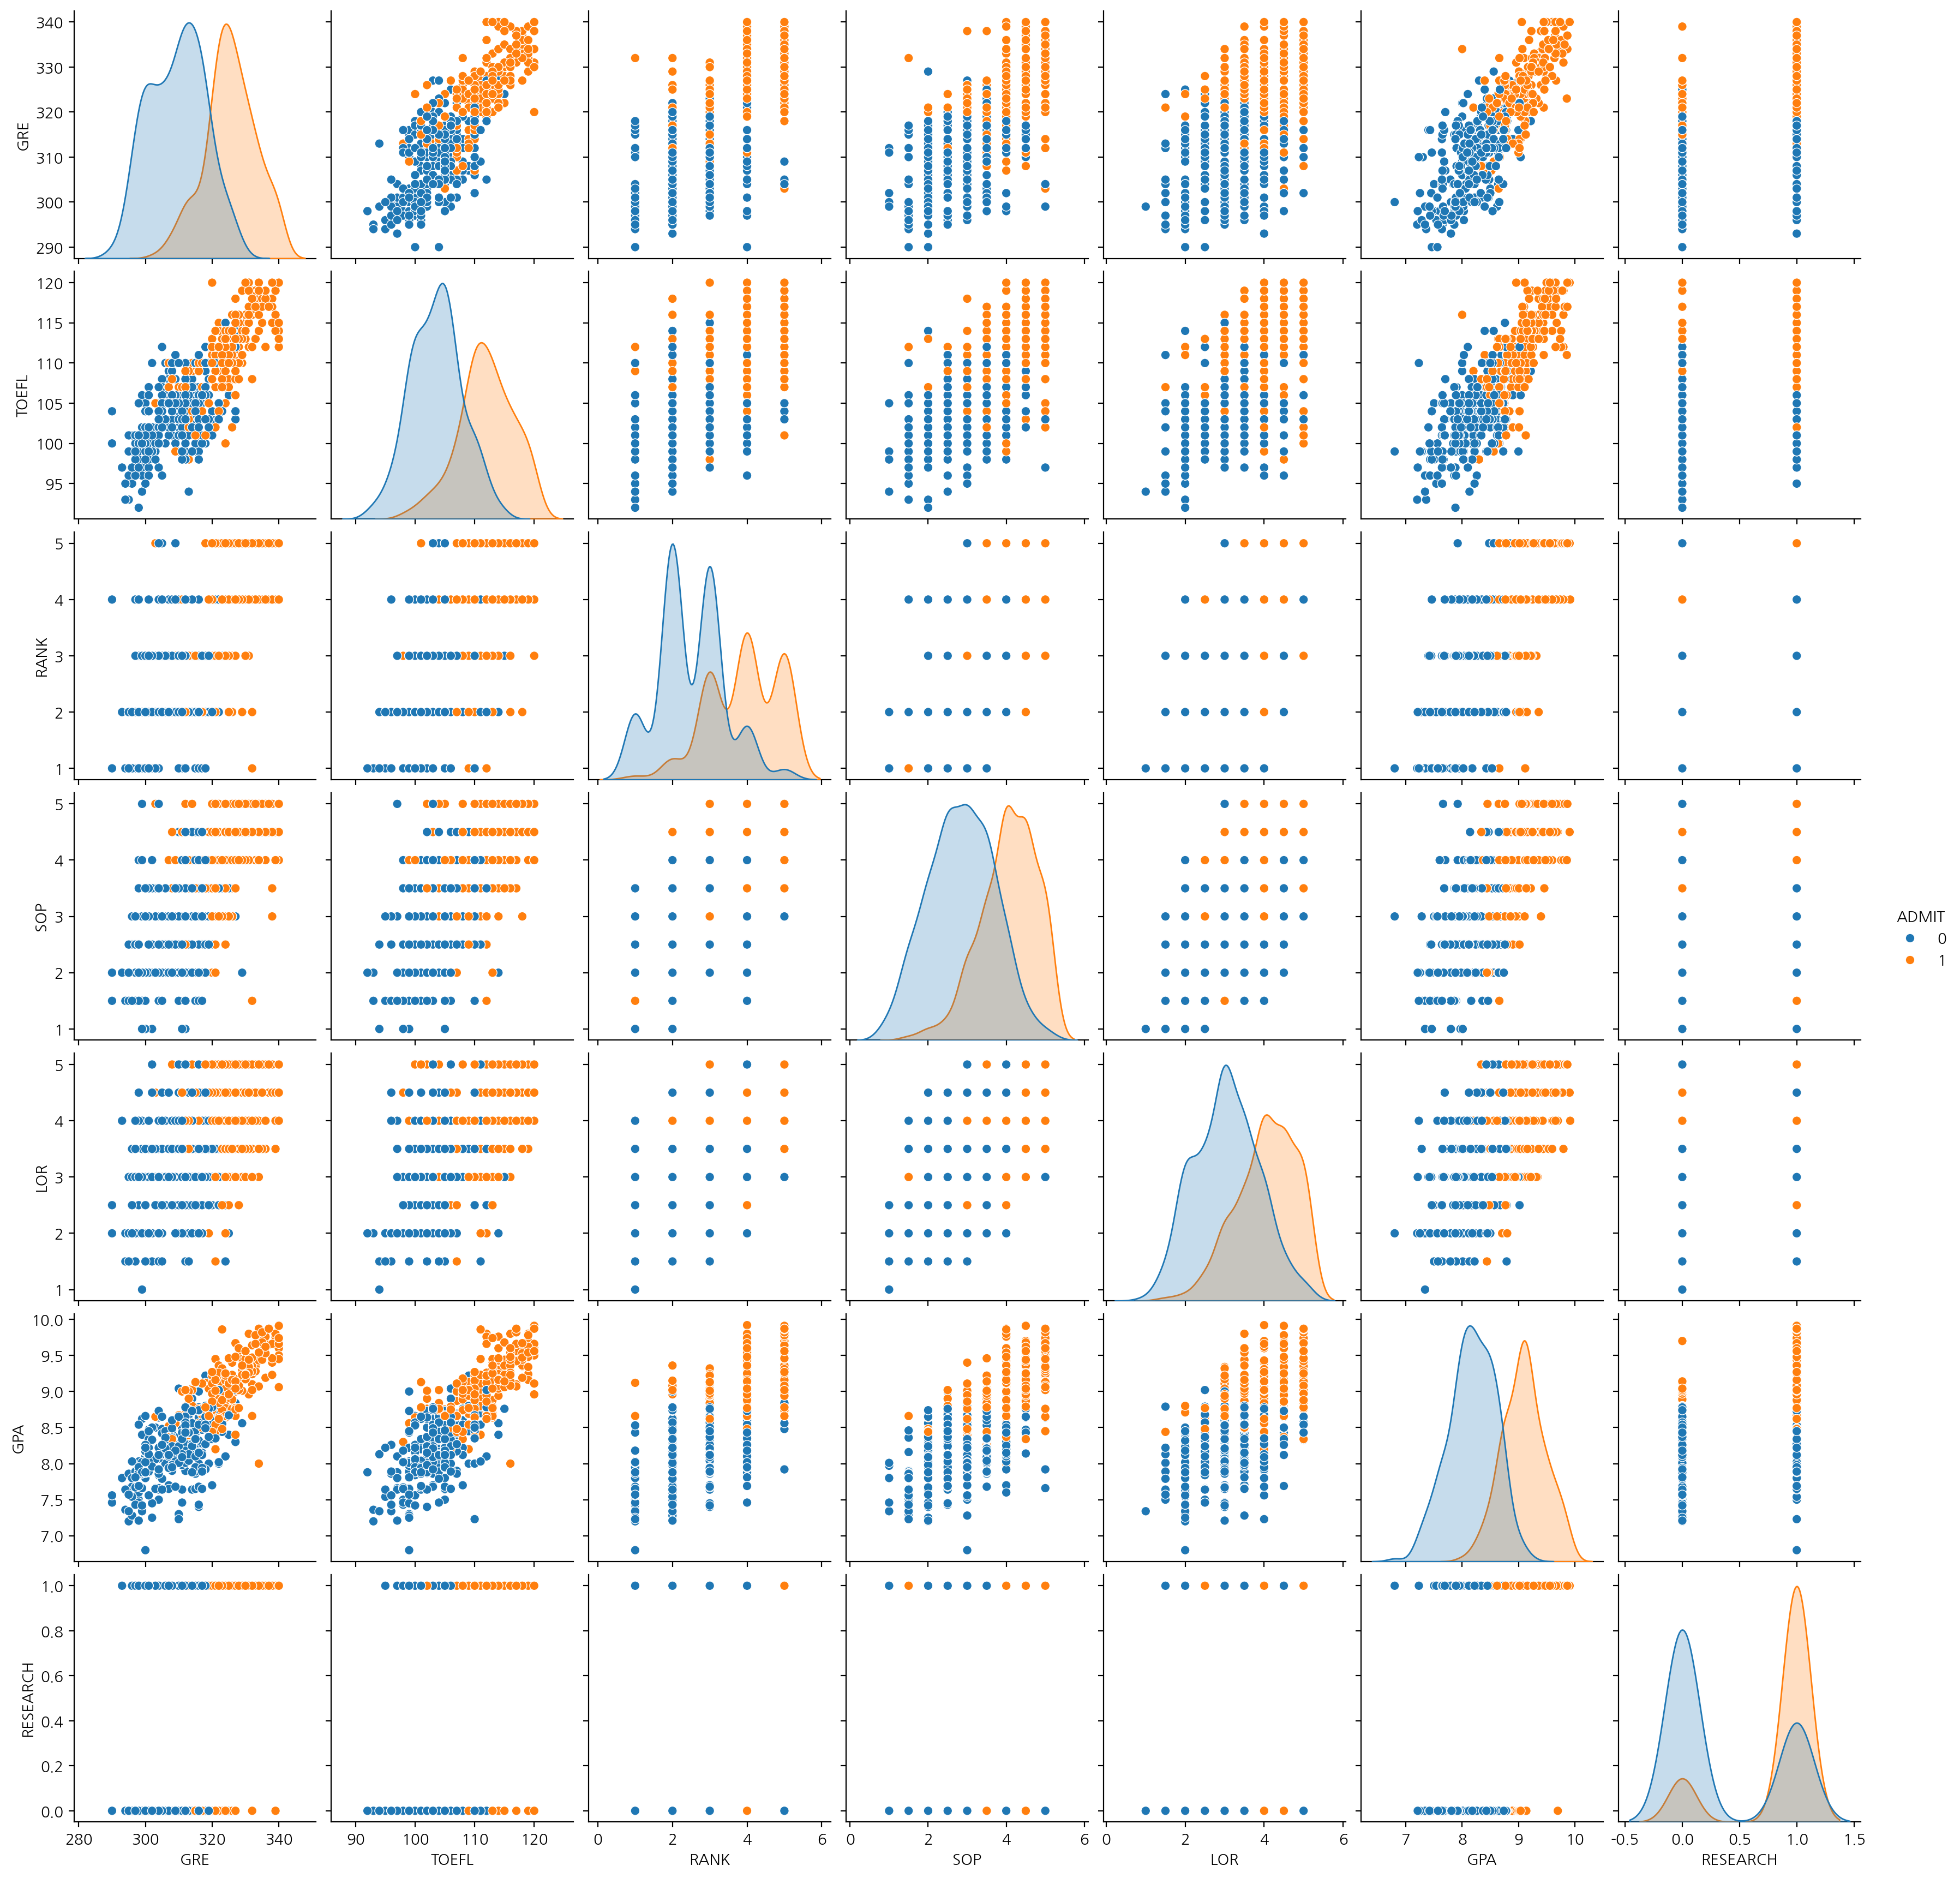

In [13]:
sns.pairplot(admission, hue='ADMIT')
plt.show()

### **3.4. Count Plot**

- **countplot()** 함수는 범주형 열의 빈도를 막대 그래프로 시각화하는 함수입니다.
- 주어진 데이터셋에서 각 범주의 개수를 계산하고 막대 그래프를 그려줍니다.
- hue 매개변수를 사용하여 특정 범주형 열을 기준으로 구분해 표시할 수 있습니다.
- order와 hue_order 매개변수를 사용하여 막대 그래프에 그려질 범주의 순서를 지정할 수 있습니다.


- ADMIT 열의 범줏값이 몇 개씩 포함되어 있는지 확인해 봅니다.

In [ ]:
sns.countplot(x='ADMIT', data=admission)
plt.show()

- hue 옵션에 RANK 열을 지정해 대학 순위별로 구분해 봅니다.

In [ ]:
sns.countplot(x='ADMIT', hue='RANK', data=admission)
plt.show()

### **3.5. Bar Plot**

- **barplot()** 함수는 범주형 열에 대한 막대 그래프를 그리는 함수입니다.
- barplot() 함수는 데이터를 추정하고 오차 막대를 표시할 수 있습니다.
- 이 오차 막대는 각 범주의 **평균**과 **신뢰 구간**을 시각화하는 데 사용됩니다.
- hue 매개변수를 사용하여 특정 범주형 열을 기준으로 구분해 표시할 수 있습니다.
- 예를 들어, hue 매개변수를 사용하여 다른 집단에 대한 데이터를 시각적으로 구분할 수 있습니다.
- barplot() 함수는 기본적으로 평균값을 계산하고 오차 막대를 그립니다.
- 필요하다면 estimator 매개변수를 사용하여 다른 추정값을 지정할 수 있습니다.
- 예를 들어, estimator=np.median를 사용하여 중앙값을 계산할 수 있습니다.

In [ ]:
sns.barplot(x='ADMIT', y='GRE', data=admission)
plt.show()

- estimator, errorbar 매개변수기본값은 다음과 같습니다.
- ci: confidence intervals, 신뢰구간
- n_boot: 신뢰구간을 구하기 위해 부트스트래핑 할 횟수(1 이상)

In [ ]:
sns.barplot(x='ADMIT', y='GRE', data=admission, estimator=np.mean, errorbar=('ci', 95), n_boot=5000)
plt.show()

In [ ]:
sns.barplot(x='ADMIT', y='GRE', data=admission, estimator=np.mean, errorbar=('ci', False))
plt.show()

### **3.6. Heatmap**

- **heatmap()** 함수는 두 범주형 열을 집계한 결과를 색의 농도 차이로 표시합니다.
- 이를 위해서 집계(groupby)와 피봇(pivot)을 먼저 만들어 줘야 합니다.
- 여러 범줏값을 갖는 열을 비교할 때 유용합니다.
- ADMIT 별 RANK 별 GRE 평균을 표시해 봅니다.

In [ ]:
temp1 = admission.groupby(['ADMIT', 'RANK'], as_index=False)['GRE'].mean()
temp2 = temp1.pivot(index='ADMIT', columns='RANK', values='GRE')
display(temp2)

sns.heatmap(temp2, annot=True, fmt='.2f')
plt.show()

- 표시되는 값을 정수로, 구간 간격을 조금 벌려봅니다.
- 색상도 다르게 지정해 봅니다.

In [ ]:
sns.heatmap(temp2, annot=True, fmt='.2f', linewidth=2, cmap='Blues')
plt.show()